# 4. Методы классфикации: Деревья решений

Алгоритм строит модель в виде древовидной структуры. Каждый внутренний узел дерева проверяет определенный признак, каждая ветвь $-$ результат проверки, а каждый лист $-$ метка класса.

![](https://www.insidealgorithms.com/wp-content/uploads/2024/05/decision-tree-featured_image-1024x576.png.webp)

Начиная с корня, дерево задает вопросы о признаках объекта. В зависимости от ответа объект спускается по соответствующей ветви до тех пор, пока не достигнет листа, который и укажет предсказанный класс.

Плюсы:
- Интерпретируемость

Минусы:
- Легко переобучается (нужны ограничения глубины, pruning)

## Пример

Попробуем классифицировать животных по двум признакам: "Имеет перья?" и "Умеет летать?".

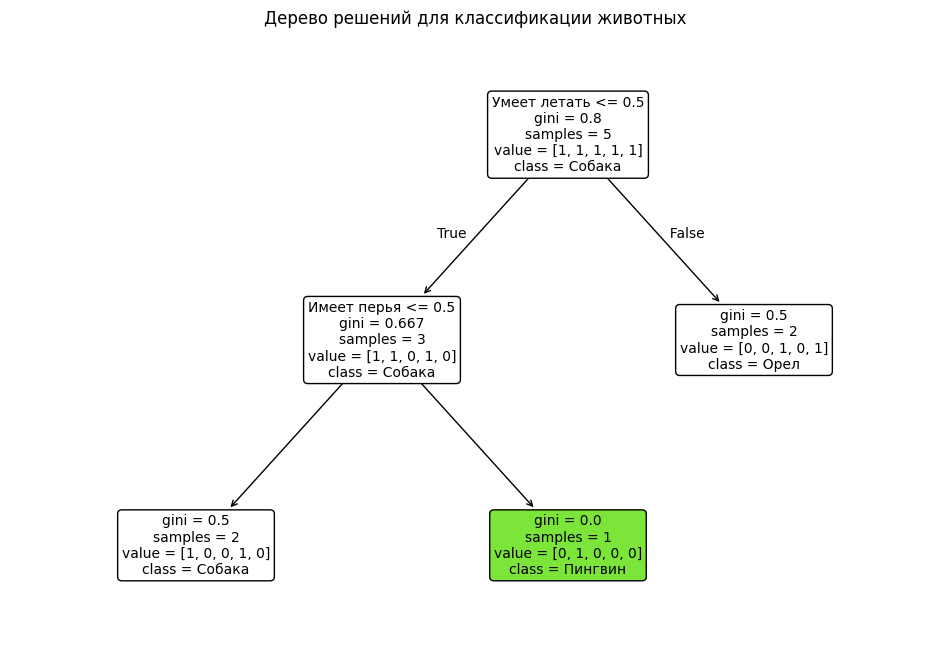

In [6]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Данные: [Имеет_перья, Умеет_летать]
features = [[0, 0], [1, 0], [1, 1], [0, 0], [1, 1]] # 0 - Нет, 1 - Да
labels = ['Собака', 'Пингвин', 'Орел', 'Кот', 'Попугай'] # Метки классов

# Преобразуем в pd.Series перед факторизацией
label_series = pd.Series(labels)
label_ids, unique_labels = pd.factorize(label_series)

# Обучаем модель
clf = tree.DecisionTreeClassifier()
clf.fit(features, label_ids)

# Визуализируем дерево
plt.figure(figsize=(12, 8))
tree.plot_tree(clf,
               feature_names=['Имеет перья', 'Умеет летать'],
               class_names=unique_labels,
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Дерево решений для классификации животных")
plt.show()

gini (коэффициент Джини/примесь Джини) $-$ это критерий разделения в деревьях решений, который измеряет "нечистоту" или "неоднородность" узла
- gini = 0 $-$ идеально чистый узел (все объекты одного класса)
- gini = 0.5 (для бинарной классификации) $-$ максимально нечистый узел (равное распределение классов)

Чем меньше Gini, тем лучше разделение

# Методы классификации: Логистическая регрессия

Несмотря на название, это _линейный классификатор_, а не регрессор. Он предсказывает _вероятность_ того, что объект принадлежит к определенному классу. Для этого используется _сигмоидная функция_ (логистическая функция), которая "сжимает" линейную комбинацию признаков в число от 0 до 1.

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

> Многомерный случай:
> 
> $$\sigma(\mathbf{W}\mathbf{x} + \mathbf{b}) = \frac{1}{1 + e^{-(\mathbf{W}\mathbf{x} + \mathbf{b})}}$$

Алгоритм строит линейную границу принятия решений. Если предсказанная вероятность больше или равна 0.5, объект относится к классу 1, иначе $-$ к классу 0.

![](https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png)


Плюсы:
- Быстрая, понятная

Минусы:
- Плоха на сложных нелинейных зависимостях (если не добавить признаки)

### Почему именно сигмоида?

Логистическая регрессия по своей основе $-$ это линейная модель. В общем многомерном случае она сначала вычисляет линейную комбинацию входных признаков:

$$z = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$$

где $w$ $-$ веса, $b$ $-$ смещение, $x$ $-$ признаки.

Проблема в том, что результат $z$ может быть любым числом от $-\infty$ до $\infty$.
Нам же для бинарной классификации нужна вероятность того, что объект принадлежит определённому классу, т.е. число от $0$ до $1$.
Это обеспечивает функция $\sigma$.

Кроме этого, использование сигмоиды $-$ следствие из предположения о распределении целевой переменной и принципа _максимального правдоподобия_ (сигмоида максимизирует правдоподобие для бинарных исходов, подчиняющихся распределению Бернулли).

## Пример

Допустим, мы хотим предсказать, купит ли клиент товар, на основе его возраста и времени, проведенного на сайте.

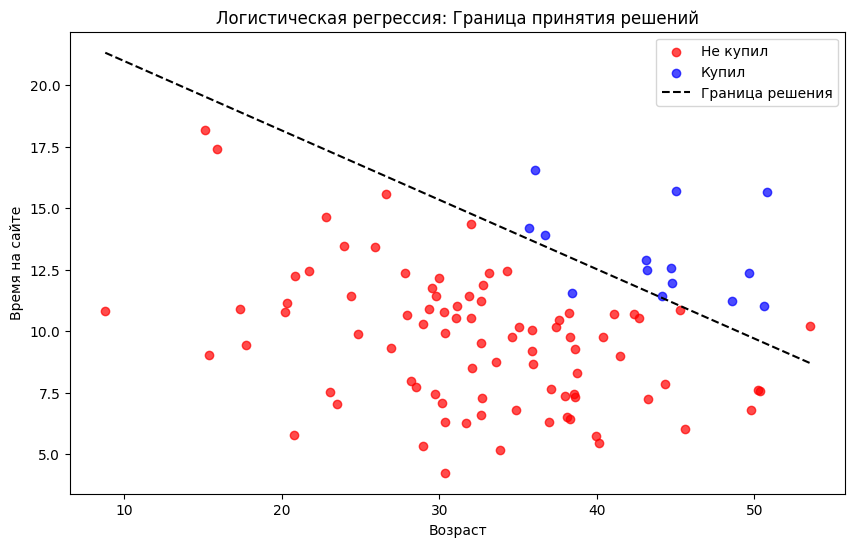

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Сгенерируем синтетические данные
np.random.seed(42)
age = np.random.normal(35, 10, 100) # Возраст
time_on_site = np.random.normal(10, 3, 100) # Время на сайте

# Создаем целевую переменную: 1 если покупка была, 0 если нет
# (логика: вероятность покупки выше у старших и тех, кто дольше на сайте)
purchase = ((age > 40) & (time_on_site > 12) | (age > 35) & (time_on_site > 11)).astype(int)

# Обучаем модель
X = np.column_stack((age, time_on_site))
model = LogisticRegression()
model.fit(X, purchase)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(age[purchase==0], time_on_site[purchase==0], c='red' , label='Не купил', alpha=0.7)
plt.scatter(age[purchase==1], time_on_site[purchase==1], c='blue', label='Купил', alpha=0.7)

# Строим границу решения
coef = model.coef_[0]
intercept = model.intercept_

age_range = np.linspace(age.min(), age.max(), 100)
decision_boundary = -(coef[0] * age_range + intercept) / coef[1] # Решаем уравнение w*x + b = 0

plt.plot(age_range, decision_boundary, 'k--', label='Граница решения')
plt.xlabel('Возраст')
plt.ylabel('Время на сайте')
plt.legend()
plt.title('Логистическая регрессия: Граница принятия решений')
plt.show()

## Ещё пример

Сначала применим логистическую регрессию, а потом деревья решений, и посмотрим, чем отличается разделение (границы классов).

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [3]:
# Вспомогательные функции для визуализации и оценки

import numpy as np

def plot_decision_boundary(ax, model, X, y, title=""):
    # Сетка точек по двум признакам
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Фон — предсказанные классы
    ax.contourf(xx, yy, Z, alpha=0.25, cmap=plt.cm.Set3)

    # Точки
    scatter = ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=35)
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

def print_binary_metrics(y_true, y_pred, name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"{name}: accuracy={acc:.3f}, precision={prec:.3f}, recall={rec:.3f}, f1={f1:.3f}")

#### Логистическая регрессия

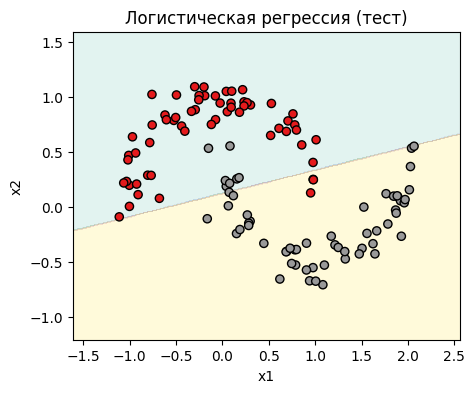

Логистическая регрессия: accuracy=0.917, precision=0.946, recall=0.883, f1=0.914


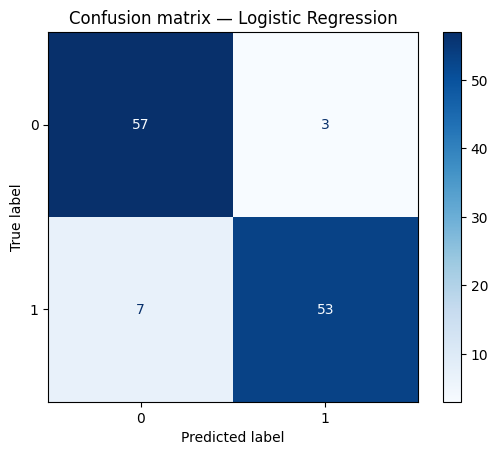

In [4]:
# Данные в виде двух полумесяцев (две луны): нелинейно разделимы
X, y = make_moons(n_samples=400, noise=0.1, random_state=42)

# Разделим на обучение/тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Пайплайн: масштабирование + логистическая регрессия
logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(random_state=42))
])
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

# Визуализация и метрики
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_decision_boundary(ax, logreg, X_test, y_test, title="Логистическая регрессия (тест)")
plt.show()

print_binary_metrics(y_test, y_pred_lr, name="Логистическая регрессия")

# Матрица ошибок
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap="Blues")
plt.title("Confusion matrix — Logistic Regression")
plt.show()

#### Деревья решений

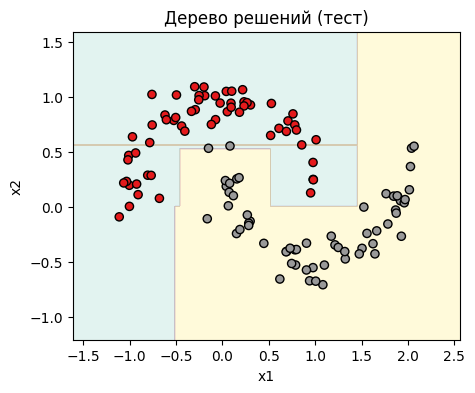

Дерево решений: accuracy=0.983, precision=1.000, recall=0.967, f1=0.983


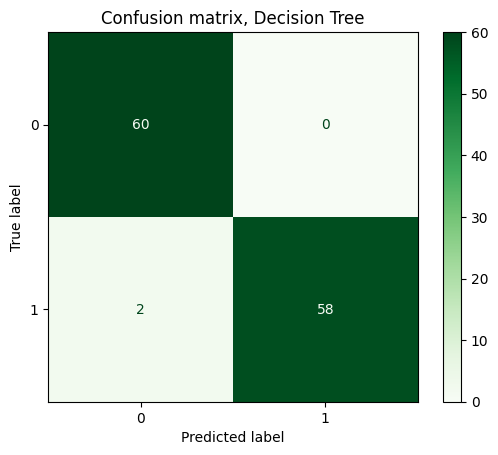

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_decision_boundary(ax, tree, X_test, y_test, title="Дерево решений (тест)")
plt.show()

print_binary_metrics(y_test, y_pred_tree, name="Дерево решений")

ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, cmap="Greens")
plt.title("Confusion matrix, Decision Tree")
plt.show()

# 2. Методы классификации: Catboost

CatBoost $-$ это мощный алгоритм, основанный на _градиентном бустинге_ (обучение ансамбля деревьев, где каждое следующее дерево исправляет ошибки предыдущих).
Его ключевая особенность $-$ он отлично работает с категориальными признаками без их предварительной обработки (например, не нужно переводить текстовые метки в числа с помощью [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)).


CatBoost строит множество деревьев последовательно. На каждом шаге он строит новое дерево, которое предсказывает не итоговый ответ, а ошибку предыдущего ансамбля. Так модель постепенно учится исправлять свои недочеты.

Идея:
- Ансамбль многих деревьев, каждое дерево исправляет ошибки предыдущих.
- Отлично работает "из коробки"; хорошо справляется с категориальными признаками (кодирование внутри).

Плюсы:
- Высокое качество, мало ручной подготовки признаков.

Минусы:
- Более тяжелый по времени/ресурсам, больше параметров для настройки.

## Пример

Допустим, у нас есть данные о животных:
- _перемещение_ (категориальный признак),
- _масса_ (числовой признак) и
- _класс_ (целевая переменная: "Хищник", "Травоядный").

In [ ]:
#!pip install catboost

In [6]:
import pandas as pd
from catboost import CatBoostClassifier, Pool

# Данные
data = {
    #'Вид': ['Собака', 'Пингвин', 'Орел', 'Кот', 'Попугай', 'Хомяк'],
    'Перемещение': ['Ходит', 'Ходит', 'Летает', 'Ходит', 'Летает', 'Ходит'],  # Категориальный признак
    'Масса': [30, 3, 7, 7, 1, 0.5] # Числовой признак
}
df = pd.DataFrame(data)

# Целевая переменная (мультикласс)
target = ['Хищник', 'Хищник', 'Хищник', 'Хищник', 'Травоядный', 'Травоядный']

# Создаем объект Pool, явно указывая категориальные признаки
train_pool = Pool(data=df, label=target, cat_features=['Перемещение']) # 'Жанр' - категориальный!

# Обучаем модель CatBoost
model = CatBoostClassifier(iterations=100, verbose=False)
model.fit(train_pool)

# Предсказание для новой книги
new_animal = pd.DataFrame({'Перемещение': ['Ходит'], 'Масса': [1]})
prediction = model.predict(new_animal)
pred_proba = model.predict_proba(new_animal)

print(f"Предсказанный класс: {prediction[0]}")
print(f"Вероятности: {pred_proba}")

Предсказанный класс: ['Травоядный']
Вероятности: [[0.51960939 0.48039061]]


## Ещё пример на данных из предыдущего раздела

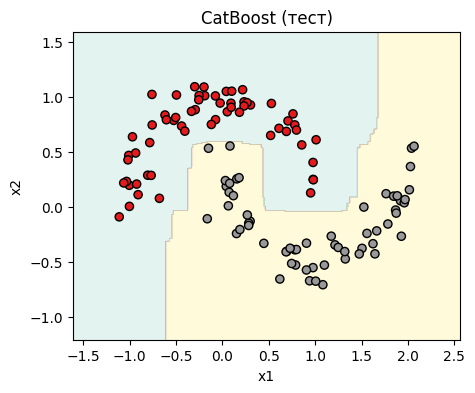

CatBoost: accuracy=1.000, precision=1.000, recall=1.000, f1=1.000


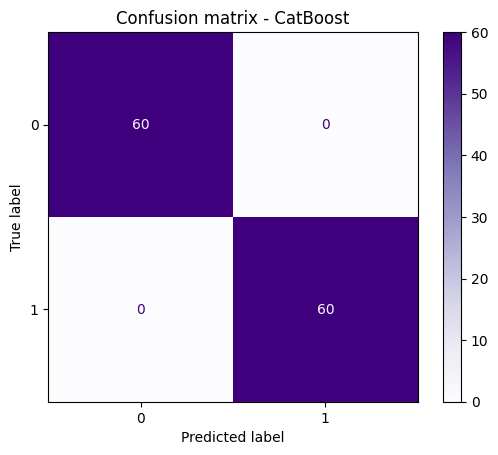

In [7]:
cat = CatBoostClassifier(
    iterations=300,       # число деревьев
    depth=6,              # глубина деревьев
    learning_rate=0.1,    # скорость обучения
    random_state=42,
    verbose=False
)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test).astype(int).ravel()

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_decision_boundary(ax, cat, X_test, y_test, title="CatBoost (тест)")
plt.show()

print_binary_metrics(y_test, y_pred_cat, name="CatBoost")

ConfusionMatrixDisplay.from_estimator(cat, X_test, y_test, cmap="Purples")
plt.title("Confusion matrix - CatBoost")
plt.show()

## Мультиклассовая классификация

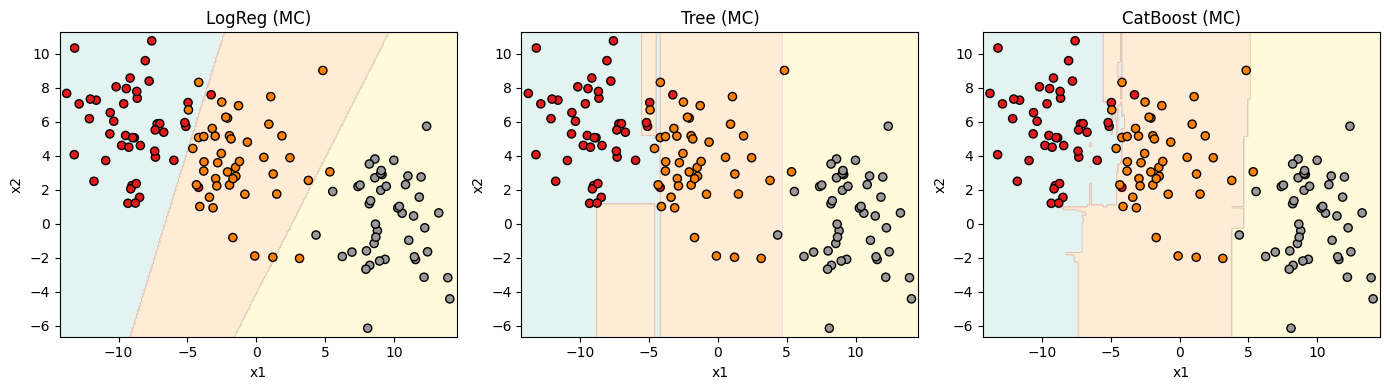

LogReg (MC): accuracy=0.956, macro-F1=0.955
Tree (MC): accuracy=0.926, macro-F1=0.926
CatBoost (MC): accuracy=0.963, macro-F1=0.963


In [8]:
from sklearn.metrics import f1_score
from sklearn.datasets import make_blobs


X3, y3 = make_blobs(n_samples=450, centers=3, cluster_std=2.3, random_state=7)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42, stratify=y3)

# 1) Логистическая регрессия (мультикласс)
logreg_mc = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(solver='lbfgs', random_state=42)) # multi_class='multinomial'
])
logreg_mc.fit(X3_train, y3_train)

# 2) Дерево решений
tree_mc = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_mc.fit(X3_train, y3_train)

# 3) CatBoost (мультикласс)
cat_mc = CatBoostClassifier(
    iterations=300, depth=6, learning_rate=0.1,
    loss_function='MultiClass',
    random_state=42, verbose=False
)
cat_mc.fit(X3_train, y3_train)

models = [("LogReg (MC)", logreg_mc), ("Tree (MC)", tree_mc), ("CatBoost (MC)", cat_mc)]

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, (name, model) in zip(axes, models):
    plot_decision_boundary(ax, model, X3_test, y3_test, title=name)
plt.tight_layout()
plt.show()

for name, model in models:
    y_pred = model.predict(X3_test)
    acc = accuracy_score(y3_test, y_pred)
    f1m = f1_score(y3_test, y_pred, average='macro')
    print(f"{name}: accuracy={acc:.3f}, macro-F1={f1m:.3f}")

Наблюдения:
- Логистическая регрессия проводит примерно линейные границы между классами.
- Дерево решений даёт "ступенчатые" границы.
- CatBoost чаще даёт более гладкую и качественную границу.

# 3. Методы классификации: Нейронные сети

Нейронная сеть $-$ это математическая модель, вдохновленная работой человеческого мозга.
Она состоит из взаимосвязанных _нейронов_, организованных в _слои_.

![](https://clevertap.com/wp-content/uploads/2019/04/Neural_Network_Brain_Mimic.jpeg)

Основные компоненты:
- _Входной слой (input)_ $-$ получает данные
- _Скрытые слои (hidden)_ $-$ выполняют вычисления
- _Выходной слой (output)_ $-$ выдает результат
- _Веса (weights)_ $-$ параметры, которые обучаются
- _Функции активации (activation functions)_ $-$ добавляют нелинейность

[Источник: [hvidberrrg.github.io](https://hvidberrrg.github.io/deep_learning/activation_functions_in_artificial_neural_networks.html)]

Биологический нейрон:

![](https://hvidberrrg.github.io/deep_learning/assets/sem_image_of_biological_neuron.png)

Математический нейрон:

![](https://hvidberrrg.github.io/deep_learning/assets/activation_function_diagram.png)

# Заключение

- Нужна простая, быстрая и базовая модель $-$ логистическая регрессия.
- Нужна интерпретируемость и нелинейность $-$ дерево решений.
- Нужна высокая точность "из коробки" и возможность применять к категориальным признакам $-$ CatBoost.
- Есть много размеченных данных, и задача сложная $-$ нейронные сети.
- Данные не имеют явной структуры, или объекты характеризуются "близостью" (рекомендации, геоданные) $-$ k-ближайших соседей (kNN).

Сравнительная таблица моделей

| Критерий | Логистическая регрессия | Дерево решений | CatBoost | kNN | Нейронные сети |
|----------|--------------------------|----------------|--------------------------|-----|----------------|
| Сложность | Простая | Средняя | Средняя / Сложная | Простая | Сложная |
| Требования к данным | Нет особых требований | Нет особых требований | Желательно много данных | Нет особых требований | Много данных |
| Интерпретируемость | Высокая | Высокая | Средняя | Высокая | Низкая |
| Время обучения | Быстрое | Быстрое | Среднее / Длительное | Не требует обучения | Длительное |
| Время предсказания | Быстрое | Быстрое | Быстрое | Медленное | Быстрое |
| Устойчивость к шуму | Средняя | Низкая | Высокая | Низкая | Средняя / Высокая |

Не забывайте:

1. Разделять данные на train/test
2. Следить за дисбалансом классов
3. Настраивать параметры методов (гиперпараметры)
4. Масштабировать признаки для kNN, логистической регрессии и нейронных сетей.

# Ссылки для дальнейшего изучения

- Матрица ошибок и метрики: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
- Метрики классификации (sklearn): https://scikit-learn.org/stable/modules/model_evaluation.html
- [scikit-learn / Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html) - документация по kNN
- [scikit-learn / Decision Trees](https://scikit-learn.org/stable/modules/tree.html) - документация по деревьям решений
- CatBoost (официальная документация): https://catboost.ai/
- Boosting (обзор): https://xgboost.readthedocs.io/en/stable/tutorials/model.html (для общего понимания бустинга)
